In [1]:
import numpy as np 
import matplotlib.pyplot as plt #Matplotlib is a Python plotting library 
%matplotlib inline 
#This is the magic number fix for plots
import seaborn as sns
# Seaborn is a library plotting in Python
import pandas as pd # import pandas this is to import the dataset in to a dataframe structure



In [2]:
#Read in the dataset as a pandas Dataframe wind_df
wind_df = pd.read_csv('./powerproduction.csv')

In [3]:
wind_df.shape #The Dataset is 500 rows and two columns

(500, 2)

In [4]:
#Prints the first 5 rows of the dataset
wind_df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [5]:
#Print the keys of the dataset
print(wind_df.keys())

Index(['speed', 'power'], dtype='object')


In [6]:
#Print Dataset shape
print(wind_df.power.shape)

(500,)


In [7]:
wind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
speed    500 non-null float64
power    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
#Prints the statistical details of the dataset
wind_df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


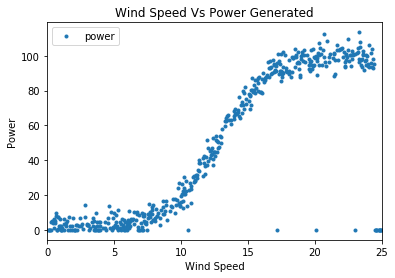

In [9]:
# Plot graph to get a visual view of the dataset
wind_df.plot(x='speed', y='power', style='.')
plt.title('Wind Speed Vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

Text(0, 0.5, 'Power')

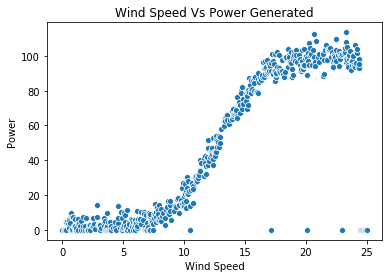

In [10]:
#The Seaborn scatter plot is added for comparsion 
sns.scatterplot(x='speed',y='power',data = wind_df)
plt.title('Wind Speed Vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power')

From both plots above it can be seen that there is a positive linear relationship between the wind speed and the power generated at certain wind speeds. There is an initial wind speed up to 7 where there is not much change in power then it is capped when the wind is over 20.

### Observations

The data looks like a sigma curve this would look like a perfect fit for Logistic regression but Logistic regression applies to categorical data.

https://builtin.com/data-science/tour-top-10-algorithms-machine-learning-newbies

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 

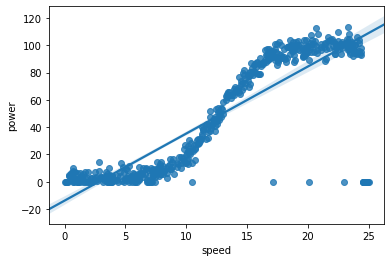

In [11]:
sns.regplot(x='speed',y='power',data = wind_df)

### Linear Regression on Raw Data
***

In this section we will run the linear regression algorithm on all the data.

The data needs to be divided in to attributes and labels. Attributes are independed labels and variables are dependent variables. So the variable power is dependent on the wind speed.


In [12]:
# The two columns values are separated from the dataset and are assigned to variables

x = wind_df.iloc[:, :-1].values
y = wind_df.iloc[:, 1].values

In [13]:
#print(x)

In [14]:
#print(y)

In [15]:
#The dataset is split for training and testing. The test size is 25% of the dataset and the training is 75%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [16]:
#The linear regression class is imported and the fit method is called on the train variables x & y
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Thie line of code displays the intercept
print(regressor.intercept_)

-13.528277120861866


In [18]:
# This line of code displays the slop coefficient of x
print(regressor.coef_)

[4.8664947]


In [19]:
y_pred = regressor.predict(x_test)

In [20]:
dfcompare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.max_rows', 500)
#pd.option_context('max_rows', None, 'display.max_columns', None)
dfcompare

,Actual,Predicted
0,7.060,10.341879
1,51.149,48.339470
2,71.763,56.982365
3,99.357,95.588267
4,113.556,99.729654
5,0.000,-9.995202
6,86.611,64.656827
7,95.117,105.209327
8,9.385,24.712638
9,14.788,23.617677


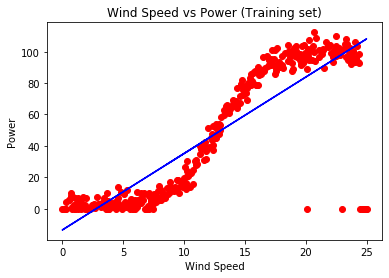

In [21]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Wind Speed vs Power (Training set)')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

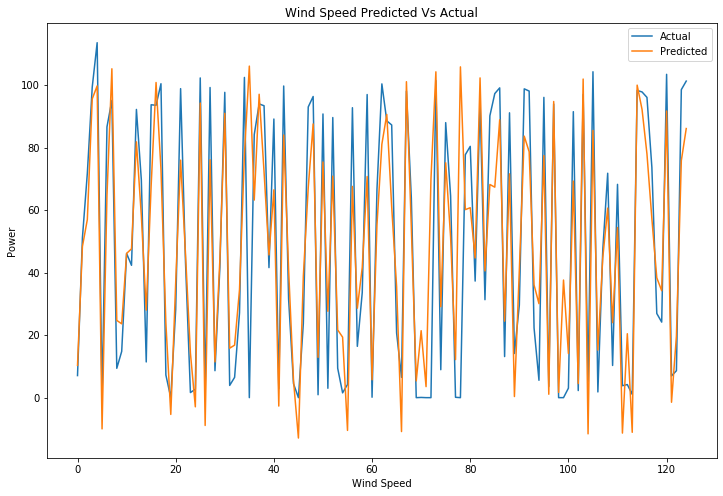

In [53]:
plt.figure(figsize=(12,8))
plt.plot(dfcompare.Actual, label='Actual')
plt.plot(dfcompare.Predicted, label='Predicted')
plt.title('Wind Speed Predicted Vs Actual')
plt.ylabel('Power')
plt.xlabel('Wind Speed')
plt.legend()
plt.show()

In [23]:
### Linear Regression on Cleansed Data
### Add readings to a new dataframe where power is no equal to 0

cleaned_wind_df = wind_df.loc[wind_df['power'] != 0 ]
cleaned_wind_df


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


In [24]:
cleaned_wind_df.shape #The Dataset is 451 rows and two columns with the pwer = 0 values removed

(451, 2)

In [25]:
cleaned_wind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 5 to 489
Data columns (total 2 columns):
speed    451 non-null float64
power    451 non-null float64
dtypes: float64(2)
memory usage: 10.6 KB


In [26]:
cleaned_wind_df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


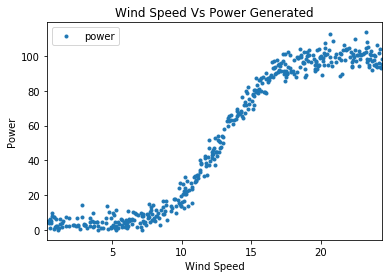

In [27]:
# Plot graph to get a visual view of the dataset without power = 0 values
cleaned_wind_df.plot(x='speed', y='power', style='.')
plt.title('Wind Speed Vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.show()

### Linear Regression on Cleaned Data
***

In this section we will run the linear regression algorithm on all the cleaned data.

The data needs to be divided in to attributes and labels. Attributes are independed labels and variables are dependent variables. So the variable power is dependent on the wind speed. 

The variables are given **'_c'** to indicate that they are from the cleaned data set **cleaned_wind_df**

In [28]:
# The two columns values are separated from the dataset and are assigned to variables

x_c = cleaned_wind_df.iloc[:, :-1].values
y_c = cleaned_wind_df.iloc[:, 1].values

In [29]:
#The dataset is split for training and testing. The test size is 25% of the dataset and the training is 75%
from sklearn.model_selection import train_test_split
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_c, y_c, test_size=0.25, random_state=0)

In [30]:
#The linear regression class is imported and the fit method is called on the train variables x_c & y_c
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_c, y_train_c)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Thie line of code displays the intercept
print(regressor.intercept_)

-21.161062215353745


In [32]:
# This line of code displays the slop coefficient of x
print(regressor.coef_)

[5.74303906]


In [33]:
y_pred_c = regressor.predict(x_test_c)

In [34]:
cleaned_dfcompare = pd.DataFrame({'Actual': y_test_c, 'Predicted': y_pred_c})
pd.set_option('display.max_rows', 500)
#pd.option_context('max_rows', None, 'display.max_columns', None)
cleaned_dfcompare

,Actual,Predicted
0,9.385,23.967739
1,0.132,1.546914
2,80.418,67.655037
3,93.698,74.845322
4,65.605,56.013897
5,6.656,27.126410
6,7.350,-16.273736
7,94.071,92.665972
8,86.288,68.809388
9,0.929,10.023640


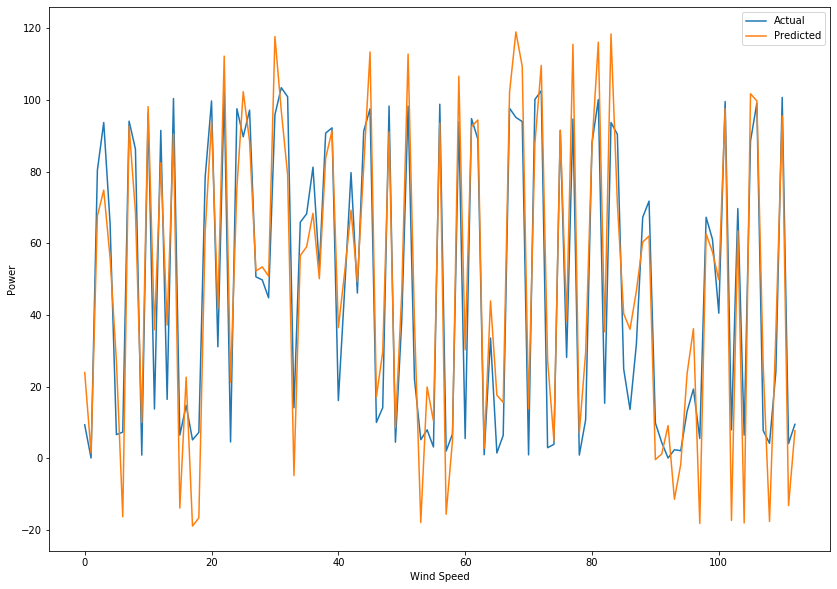

In [35]:
plt.figure(figsize=(14,10))
plt.plot(cleaned_dfcompare.Actual, label='Actual')
plt.plot(cleaned_dfcompare.Predicted, label='Predicted')
plt.ylabel('Power')
plt.xlabel('Wind Speed')
plt.legend()
plt.show()

### Evaluating the Accuracy of the Model

To evaluate the accuracy of the model on both the original dataset and the cleaned dataset we will use the following three evaluation metrics



https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/



In [36]:
from sklearn import metrics


#calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

14.777550003831134
433.83699484755914
20.82875403972977


In [37]:

#calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test_c, y_pred_c))
print(metrics.mean_squared_error(y_test_c, y_pred_c))
print(np.sqrt(metrics.mean_squared_error(y_test_c, y_pred_c)))

11.868436744376112
194.15380632841203
13.93390850868528


### Using Neural Network


In [106]:
import sklearn.neural_network as sknn




# Train the neural network.
regr = sknn.MLPRegressor(max_iter=10000).fit(w2d, d)

# Show the predictions.
np.array([d, regr.predict(w2d)]).T

array([[ 10.1478214 ,  10.63459339],
       [ 16.52592887,  14.33831801],
       [ 11.0782599 ,  18.03843629],
       [ 21.5295115 ,  23.32347209],
       [ 30.75384247,  28.60749466],
       [ 37.56111854,  33.88479279],
       [ 50.02678309,  39.15505397],
       [ 32.691295  ,  44.42231156],
       [ 53.73623246,  49.68956915],
       [ 55.11556327,  54.95682674],
       [ 65.42852731,  60.22408433],
       [ 65.18937381,  65.49134191],
       [ 69.16891391,  70.7585995 ],
       [ 71.95859775,  76.02585709],
       [ 87.91651516,  81.29311468],
       [ 82.39453816,  86.56037227],
       [ 84.58972783,  91.82762985],
       [ 98.56512783,  97.09488744],
       [ 97.63456669, 102.36214503],
       [113.6908186 , 107.62940262],
       [114.19895203, 112.89666021]])

### Apply Neural Network to Raw dataset

In [107]:
print(x)
x.shape

[[ 0.   ]
 [ 0.125]
 [ 0.15 ]
 [ 0.225]
 [ 0.275]
 [ 0.325]
 [ 0.4  ]
 [ 0.45 ]
 [ 0.501]
 [ 0.526]
 [ 0.551]
 [ 0.576]
 [ 0.626]
 [ 0.676]
 [ 0.701]
 [ 0.726]
 [ 0.751]
 [ 0.801]
 [ 0.826]
 [ 0.851]
 [ 0.926]
 [ 0.951]
 [ 0.976]
 [ 1.001]
 [ 1.026]
 [ 1.051]
 [ 1.076]
 [ 1.101]
 [ 1.151]
 [ 1.251]
 [ 1.276]
 [ 1.301]
 [ 1.401]
 [ 1.426]
 [ 1.502]
 [ 1.552]
 [ 1.652]
 [ 1.677]
 [ 1.702]
 [ 1.827]
 [ 1.877]
 [ 1.902]
 [ 2.027]
 [ 2.077]
 [ 2.102]
 [ 2.177]
 [ 2.227]
 [ 2.252]
 [ 2.402]
 [ 2.477]
 [ 2.553]
 [ 2.578]
 [ 2.703]
 [ 2.828]
 [ 2.853]
 [ 2.953]
 [ 3.003]
 [ 3.028]
 [ 3.053]
 [ 3.078]
 [ 3.128]
 [ 3.203]
 [ 3.378]
 [ 3.403]
 [ 3.428]
 [ 3.504]
 [ 3.529]
 [ 3.579]
 [ 3.604]
 [ 3.629]
 [ 3.679]
 [ 3.704]
 [ 3.729]
 [ 3.779]
 [ 3.804]
 [ 3.879]
 [ 3.904]
 [ 3.929]
 [ 3.954]
 [ 3.979]
 [ 4.179]
 [ 4.304]
 [ 4.329]
 [ 4.429]
 [ 4.53 ]
 [ 4.555]
 [ 4.605]
 [ 4.73 ]
 [ 4.78 ]
 [ 4.88 ]
 [ 4.905]
 [ 4.93 ]
 [ 4.955]
 [ 4.98 ]
 [ 5.03 ]
 [ 5.08 ]
 [ 5.13 ]
 [ 5.18 ]
 [ 5.205]
 [ 5.255]


(500, 1)

In [108]:
# Train the neural network.
regr = sknn.MLPRegressor(max_iter=100000).fit(x, y)

# Show the predictions.
result = np.array([y, regr.predict(x)]).T

In [109]:
type(result)


numpy.ndarray

In [ ]:
regr.score(w2d, d)

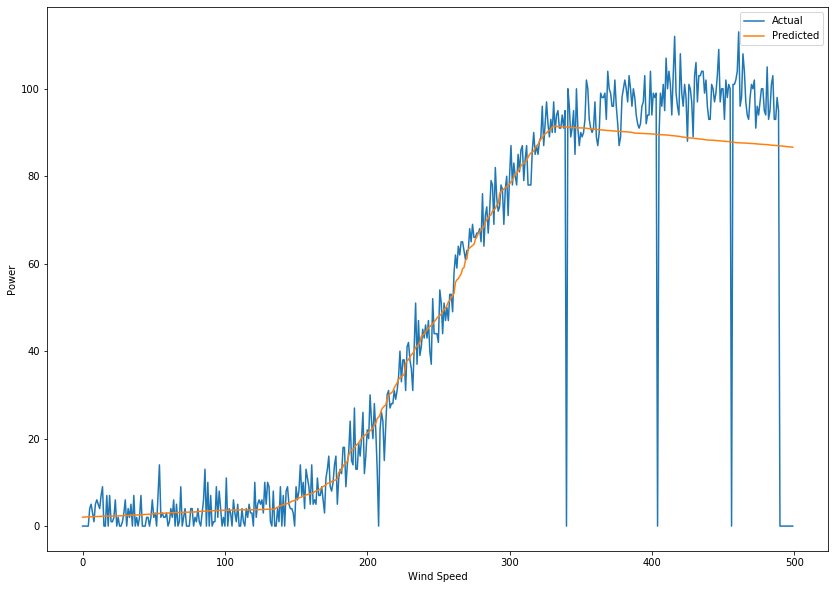

In [88]:
plt.figure(figsize=(14,10))
plt.plot(y, label='Actual')
plt.plot(regr.predict(x), label='Predicted')
plt.ylabel('Power')
plt.xlabel('Wind Speed')
plt.legend()
plt.show()

In [110]:
regr.score(regr.predict(x),y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.13989754  2.16993356  2.17594077  2.19396238  2.20597679  2.2179912
  2.23601281  2.24802722  2.26028192  2.26628912  2.27229633  2.27830353
  2.29031794  2.30233235  2.30833955  2.31434676  2.32035396  2.33236837
  2.33837558  2.34438278  2.3624044   2.3684116   2.3744188   2.38042601
  2.38643321  2.39244042  2.39844762  2.40445483  2.41646924  2.44049806
  2.44650526  2.45251246  2.47654128  2.48254849  2.50081039  2.5128248
  2.53685362  2.54286082  2.54886803  2.57890405  2.59091846  2.59692566
  2.62696168  2.63897609  2.6449833   2.66300491  2.67501932  2.68102653
  2.71706975  2.73509137  2.75335327  2.75936047  2.7893965   2.81943252
  2.82543972  2.84946854  2.86148295  2.86749016  2.87349736  2.87950457
  2.89151897  2.90954059  2.95159102  2.95759822  2.96360543  2.98186733
  2.98787454  2.99988894  3.00589615  3.01190335  3.02391776  3.02992497
  3.03593217  3.04794658  3.05395379  3.0719754   3.0779826   3.08398981
  3.08999701  3.09600422  3.14406185  3.17409788  3.18010508  3.2041339
  3.22840301  3.23441021  3.24642462  3.27646064  3.28847505  3.31250387
  3.31851107  3.32451828  3.33052548  3.33653269  3.3485471   3.36056151
  3.37257592  3.38459033  3.39059753  3.40261194  3.40861914  3.41462635
  3.44466237  3.45066958  3.46292427  3.47493868  3.4929603   3.5049747
  3.51098191  3.51698911  3.52900352  3.53501073  3.54101793  3.55903955
  3.56504675  3.57105395  3.57706116  3.58306836  3.58907557  3.60108998
  3.60709718  3.61310439  3.61911159  3.6251188   3.63713321  3.66716923
  3.67918364  3.69119805  3.69720525  3.72748156  3.74550318  3.75751758
  3.76352479  3.76953199  3.7815464   3.78755361  3.81158243  3.81758963
  3.8739675   4.00254818  4.13112887  4.38829025  4.51687094  4.64545163
  4.77403231  4.902613    5.14520487  5.50856209  5.62968117  5.75080024
  6.11900223  6.36124037  6.60347852  6.72398391  6.90079791  6.98920491
  7.07761192  7.34283292  7.43123993  7.51964693  7.60805393  7.69646093
  7.78486794  8.13849595  8.31530995  8.49212396  8.66893796  8.75734496
  9.11097297  9.46460098  9.64141499  9.91017228 10.26380029 10.35220729
 10.44061429 10.7058353  10.97105631 11.05946331 11.14787031 11.41309132
 12.29716134 12.47397535 12.83311905 14.00189723 14.94626999 15.18002563
 15.6475369  16.81631508 17.51758198 17.75133762 17.98509325 18.21884889
 18.68636016 18.94707639 19.22628277 19.78469553 20.34310828 20.62231466
 20.90152104 21.18072742 21.4599338  21.73914018 22.01834656 22.29755294
 22.57675932 23.41437846 23.69358484 24.81041036 25.10078499 25.65919775
 26.77602327 27.33443603 27.61364241 27.89284879 29.28888068 30.12649982
 30.4057062  30.68491258 30.96411896 31.8017381  32.36015086 32.91856362
 33.75618276 34.03538913 34.31459551 34.59380189 34.87300827 37.39703394
 37.9554467  38.23465308 38.79306584 39.3514786  39.63068498 40.18909774
 41.02671688 41.30592326 41.58512964 42.1435424  43.53957429 43.81878067
 44.09798705 44.65639981 44.93560619 45.49401895 45.77322533 46.05243171
 46.33163809 46.89005085 47.16925723 47.73883824 48.01804462 48.297251
 48.57645738 49.13487014 49.6932829  49.97248928 50.53090203 51.36852117
 51.64772755 52.48534669 52.76455307 53.32296583 55.83582325 56.394236
 56.67344238 57.23185514 57.7902679  58.91826167 59.19746805 60.87270633
 61.15191271 63.38556375 63.66477013 63.94397651 64.22318289 64.50238926
 65.61921478 66.17762754 67.01524668 67.29445306 67.85286582 68.1320722
 68.41127858 69.5281041  70.09768511 70.65609787 70.93530425 71.21451063
 72.05212977 72.33133615 72.61054252 73.44816166 73.72736804 75.96101908
 76.51943184 76.79863822 77.0778446  77.35705098 77.63625736 77.91546374
 78.19467011 78.74322741 78.99906101 79.76656181 80.27666869 80.50565647
 80.97227797 81.42975002 82.1159581  82.57343015 82.80216618 83.03090221
 83.48837426 84.40331837 85.08952645 85.5469985  85.77573453 86.00447055
 86.91941466 87.37688671 87.83435877 88.52056685 89.20677493 89.43551095
 90.3596045  90.58834053 90.81707655 91.27454861 91.50279795 91.72927447
 91.8737508  91.83904673 91.77977198 91.76001372 91.74025547 91.72049722
 91.70073897 91.66122247 91.62170596 91.60194771 91.58218946 91.50315645
 91.46363995 91.4438817  91.42412345 91.38460694 91.36484869 91.34509044
 91.32533219 91.30478361 91.28502535 91.2652671  91.24550885 91.2257506
 91.20599235 91.08744284 91.06768459 91.04792633 91.00840983 90.88986032
 90.87010207 90.85034382 90.75155256 90.71203605 90.67251955 90.63300305
 90.6132448  90.59348654 90.51366321 90.49390496 90.45438845 90.4346302
 90.37535545 90.33583894 90.31608069 90.29632244 90.25680594 90.23704768
 90.19753118 90.17777293 90.13825643 90.09873992 90.07898167 90.05922342
 89.99994866 89.98019041 89.92091566 89.78260789 89.70278456 89.68302631
 89.66326805 89.6435098  89.62375155 89.6039933  89.58423505 89.5644768
 89.52496029 89.50520204 89.48544379 89.46568554 89.42616903 89.38665253
 89.36689428 89.30761952 89.26810302 89.24834477 89.22858652 89.20882827
 89.16931176 89.12979526 89.11003701 89.09027876 89.0705205  88.97172925
 88.93142241 88.89190591 88.83263115 88.8128729  88.73383989 88.71408164
 88.65480689 88.51649913 88.49674087 88.45722437 88.29915836 88.2398836
 88.22012535 88.2003671  88.18060885 88.1608506  88.06126901 88.0217525
 87.982236   87.90320299 87.88344474 87.82416999 87.74513698 87.70562048
 87.64634572 87.58707097 87.56731271 87.54755446 87.52779621 87.50803796
 87.48827971 87.42900495 87.38948845 87.3697302  87.34918162 87.27014861
 87.23063211 87.1911156  87.1515991  87.13184085 87.1120826  87.07256609
 86.97377483 86.95401658 86.87498358 86.79595057 86.77619232 86.75643406
 86.73667581 86.71691756 86.69715931 86.67740106 86.63788455 86.59836805
 86.5786098  86.53830297 86.51854471 86.49878646 86.47902821 86.41975346
 86.3999952  86.34072045 86.3209622  86.30120395 86.26168744 86.22217094
 86.20241269 86.16289618 86.14313793 86.04434667 86.02458842 85.98507192
 85.94555542 85.90603891 85.88628066 85.86652241 85.7874894  85.76694082
 85.72742432 85.66814956 85.58911655 85.5693583  85.51008355 85.4903253
 85.43105054 85.39153404].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Apply Neural Network to Cleaned dataset

In [103]:
# Train the neural network.
regr = sknn.MLPRegressor(max_iter=10000).fit(x_c, y_c)

# Show the predictions.
result = np.array([y_c, regr.predict(x_c)]).T

In [104]:
result

array([[4.33100000e+00, 3.72068936e+00],
       [5.18600000e+00, 3.73441130e+00],
       [3.82600000e+00, 3.74355926e+00],
       [1.04800000e+00, 3.75289018e+00],
       [5.55300000e+00, 3.75746416e+00],
       [6.49800000e+00, 3.76203814e+00],
       [5.24100000e+00, 3.76661212e+00],
       [4.22000000e+00, 3.77576008e+00],
       [7.97400000e+00, 3.78490804e+00],
       [9.74600000e+00, 3.78948202e+00],
       [7.27100000e+00, 3.80777795e+00],
       [7.95000000e-01, 3.81235193e+00],
       [7.35000000e+00, 3.81692591e+00],
       [1.99600000e+00, 3.83064785e+00],
       [1.60900000e+00, 3.83522183e+00],
       [2.06400000e+00, 3.83979581e+00],
       [6.51100000e+00, 3.84436979e+00],
       [2.08500000e+00, 3.85351775e+00],
       [1.21000000e-01, 3.86266571e+00],
       [1.20800000e+00, 3.87181367e+00],
       [3.37300000e+00, 3.89010959e+00],
       [6.51000000e+00, 3.89468357e+00],
       [4.15600000e+00, 3.91755347e+00],
       [2.00500000e+00, 3.92212745e+00],
       [5.352000

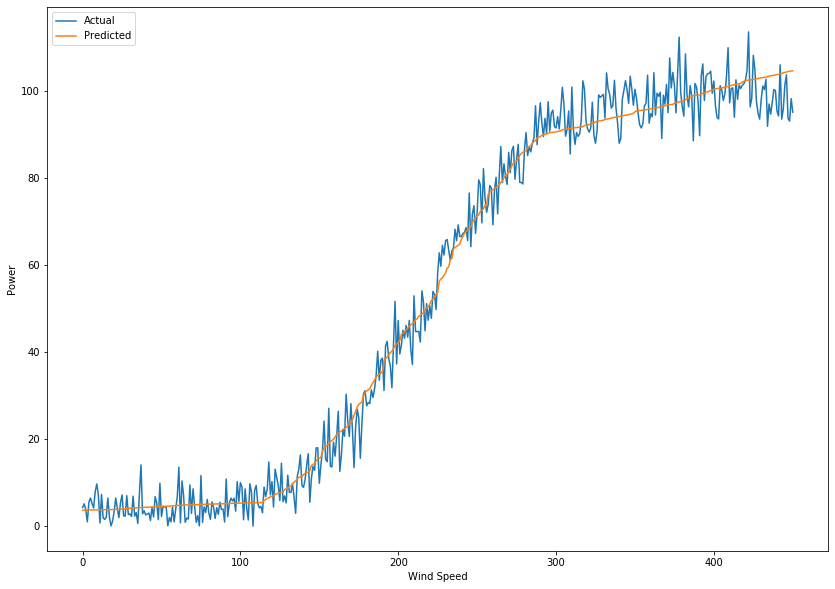

In [105]:
plt.figure(figsize=(14,10))
plt.plot(y_c, label='Actual')
plt.plot(regr.predict(x_c), label='Predicted')
plt.ylabel('Power')
plt.xlabel('Wind Speed')
plt.legend()
plt.show()

### References 

(https://datacarpentry.org/python-ecology-lesson/02-starting-with-data/) "Working With Pandas DataFrames in Python"

(https://stackabuse.com/linear-regression-in-python-with-scikit-learn/) "Linear Regression in Python with Scikit-Learn"

